**Importing Required Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

**Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Dropping Unwanted Columns**

In [ ]:
df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'],axis=1,inplace=True)

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
df.shape

(7109, 19)

**Checking missing values**

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

**Imputing the values**

In [ ]:
print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [ ]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace = True)

In [ ]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [ ]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace = True)

In [ ]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [ ]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].median(),inplace=True)

In [ ]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

There are no null values after imputation.

**Dropping the Duplicates**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

**Checking Datatypes**

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

**Changing to Proper Datatype**

In [ ]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

**Creating Age of the building column based on the datesale and datebuild columns**

In [ ]:
df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [ ]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

All Columns Changed to Proper Datatype.

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


**Describing the Numarical Columns**

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


Categorical Columns: AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE 

**Checking Unique elements in Categorical Columns**

In [ ]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique()) 

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


The problem with categorical columns is Spelling mistakes.

**Correcting the Spelling Mistakes**

In [ ]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [ ]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


After correcting all Spelling mistakes in Categorical Columns, the above are the Unique names.

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

**Exploratory Data Analysis**

***EDA for Categorical Columns***

**Checking Relationship in between the AREA Feature and SALES_PRICE Target columns**

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

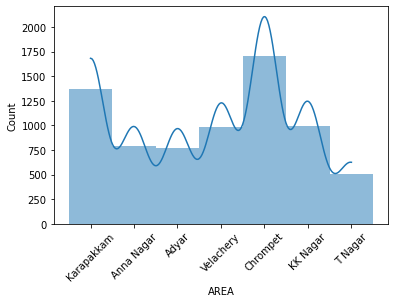

In [ ]:
sns.histplot(df.AREA, linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

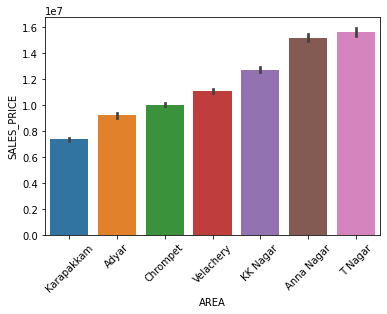

In [ ]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)
plt.xticks(rotation=45)

Anna Nagar and T Nagar are the area's with highest sale-price.

* There is a Linear Relationship in between AREA Feature and SALES_PRICE 
Target. So, will do label encoding for AREA column.
* This feature will help in model fitting.





**Checking Relationship in between the SALE_COND Feature and SALES_PRICE Target columns**

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

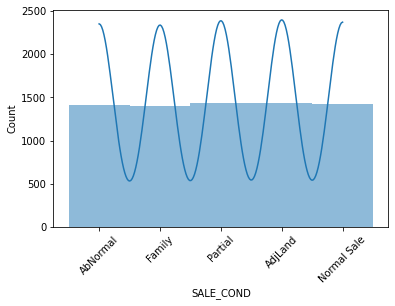

In [ ]:
sns.histplot(df.SALE_COND, linewidth=0,kde=True)
plt.xticks(rotation=45)

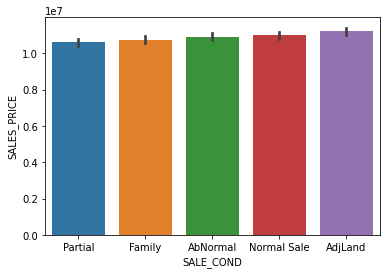

In [ ]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = sale_cond_order)

In SALE_COND condition Column, all Categories are uniformly distributed.

* There is no Relationship between SALE_COND Feature and SALES_PRICE Target Columns.
* will drop the SALE_COND feature from this dataset.



**Checking Relationship in between the PARK_FACIL Feature and SALES_PRICE Target columns**

([0, 1], <a list of 2 Text major ticklabel objects>)

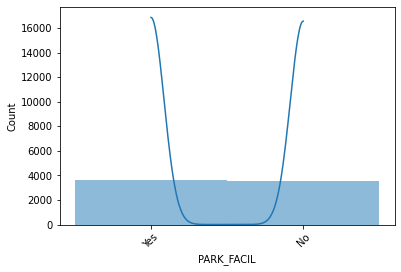

In [ ]:
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

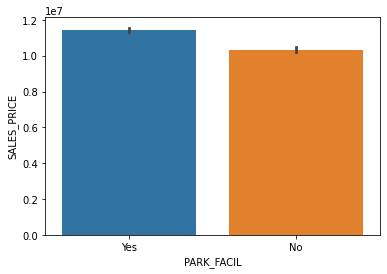

In [ ]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)

*  Houses having Park Facilities are more expensive than the houses with no park facility.

* There is a strong linear relationship in between PARK_FACIL Feature and SALES_PRICE Target.
* This feature is very useful at the time of model fitting.will keep as it is.



**Checking Relationship in between the BUILDTYPE Feature and SALES_PRICE Target columns**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

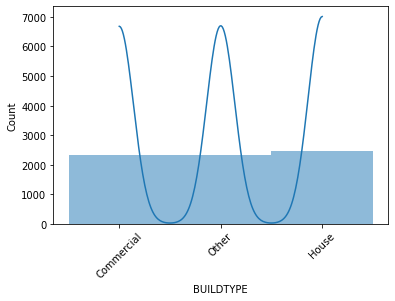

In [ ]:
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)
plt.xticks(rotation=45)

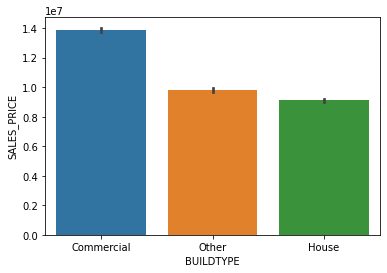

In [ ]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)

Commercial Buildings are expensive than the other type of buildings.

* There is a relationship in between the BUILDTYPE Feature and SALES_PRICE Target. But there is no linear relationship in between these features. So, will do ONE - HOT encoding for BUILDTYPE column.
* will keep this feature as it is.



**Checking Relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target columns**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

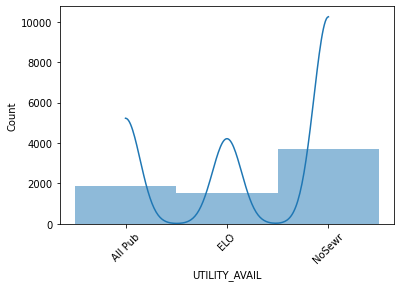

In [ ]:
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

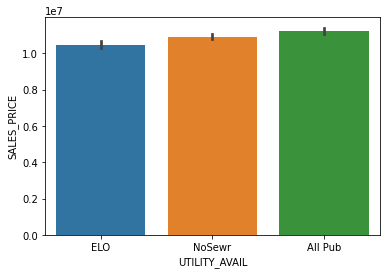

In [ ]:
utility_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = utility_avail_order)

* There is a linear relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target. So, will do label encoding for UTILITY_AVAIL column.
* Will use this feature in model fitting.




**Checking Relationship in between the STREET Feature and SALES_PRICE Target columns**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

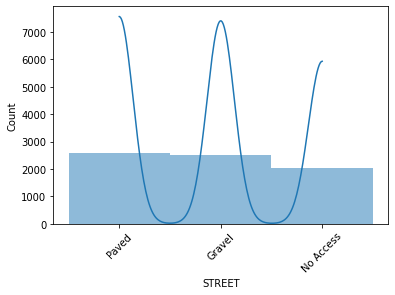

In [ ]:
sns.histplot(df.STREET, linewidth=0,kde=True)
plt.xticks(rotation=45)

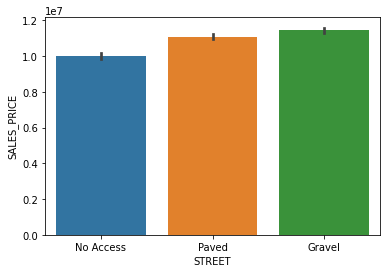

In [ ]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = street_order)

Gravel Street houses are more expensive than other types.

* There is a linear relationship in between the STREET Feature and SALES_PRICE Target. So, will do label encoding for this STREET feature.
* Will use this feature for furthur process.



**Checking Relationship in between the MZZONE Feature and SALES_PRICE Target columns**

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

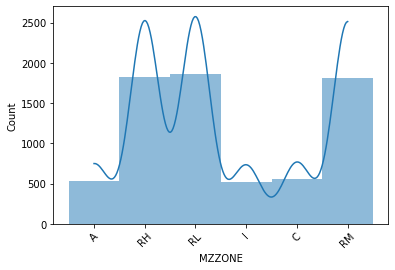

In [ ]:
sns.histplot(df.MZZONE, linewidth=0,kde=True)
plt.xticks(rotation=45)

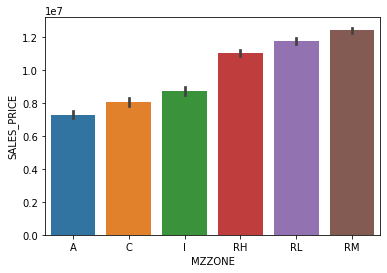

In [ ]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order = mzzone_order)

MZZONE with the values 'RM','RL' & 'RH' has higher sales_price than the other values

* There is a linear relationship in between the MZZONE Feature and SALES_PRICE Target. So, will do label encoding for MZZONE feature.
* will use this feature for furthur process.




**Checking Relationship in between the N_BEDROOM Feature and SALES_PRICE Target columns**

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 11 Text major ticklabel objects>)

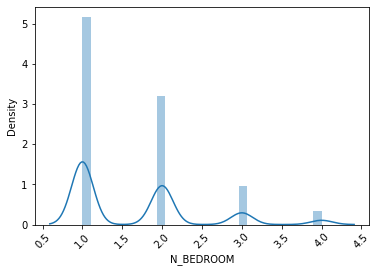

In [ ]:
sns.distplot(df['N_BEDROOM'])
plt.xticks(rotation = 45)

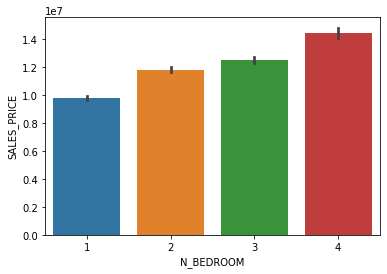

In [ ]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

Number of bed rooms increasing then Sales price also increasing.

* There is a linear relationship in between the N_BEDROOM Feature and SALES_PRICE Target.
* will use this feature for furthur process.



**Checking Relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns**

(array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]),
 <a list of 10 Text major ticklabel objects>)

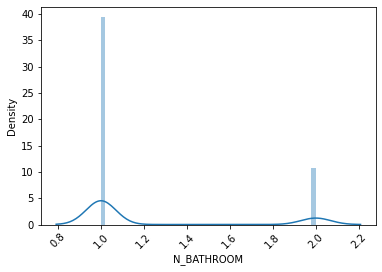

In [ ]:
sns.distplot(df['N_BATHROOM'])
plt.xticks(rotation = 45)

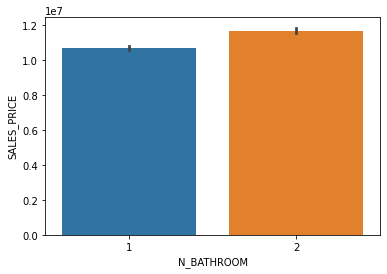

In [ ]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

N_BATHROOM increases then SALES_PRICE is automatically increasing.

* There is a linear relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns.
* will keep this feature as it is.



**Checking Relationship in between the N_ROOM Feature and SALES_PRICE Target columns**

(array([1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Text major ticklabel objects>)

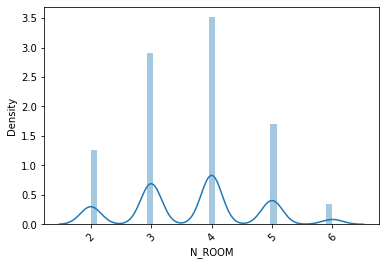

In [ ]:
sns.distplot(df['N_ROOM'])
plt.xticks(rotation = 45)

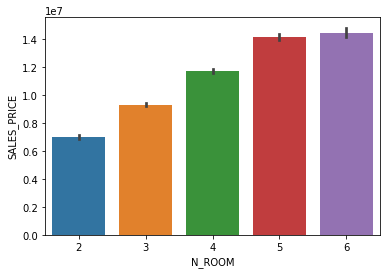

In [ ]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

N_ROOMS increases then SALES_PRICE is automatically increasing.

* There is a relationship in between the N_ROOM Feature and SALES_PRICE Target columns.
* will keep this feature as it is.



***EDA for Numarical Columns***

**Checking Linear Relationship in between the INT_SQFT Feature and SALES_PRICE Target columns**

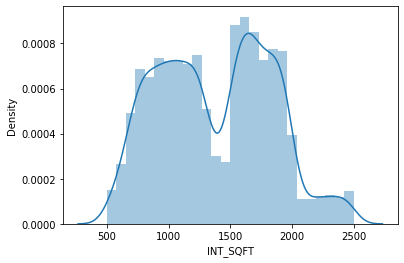

In [ ]:
sns.distplot(df['INT_SQFT'])

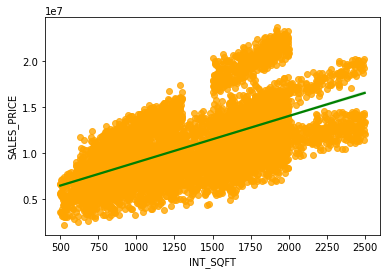

In [ ]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is a strong linear relationship in between the INT_SQFT Feature and SALES_PRICE Target columns.
* This feature is very important to keep for furthur process.



**Checking Relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns**

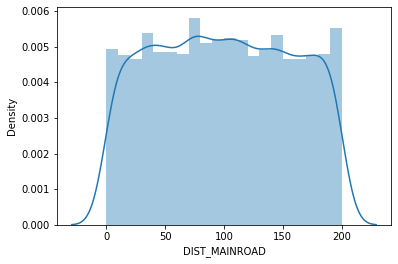

In [ ]:
sns.distplot(df['DIST_MAINROAD'])

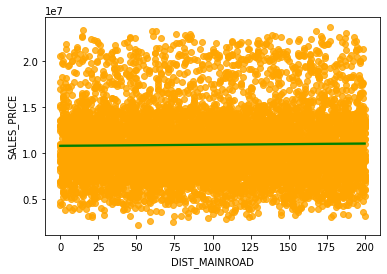

In [ ]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns.
* There is no use of keeping this feature for furthur process.
* Better to drop this feature.




**Checking Relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns**

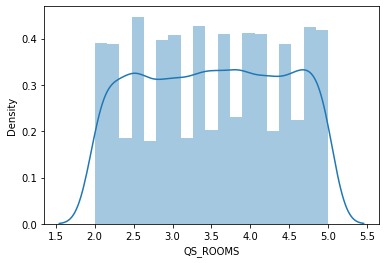

In [ ]:
sns.distplot(df['QS_ROOMS'])

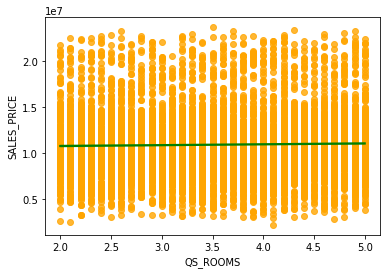

In [ ]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns.
* will drop this feature from the dataset.



**Checking Relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns**

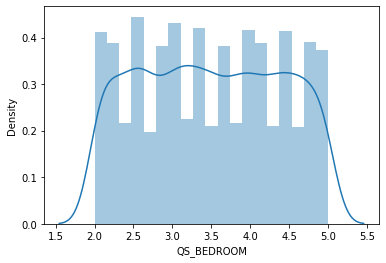

In [ ]:
sns.distplot(df['QS_BEDROOM'])

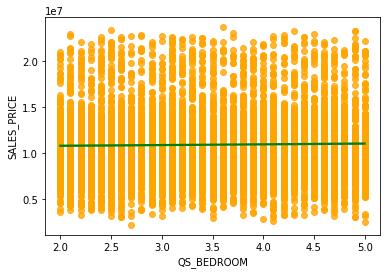

In [ ]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns.
* will drop this feature from the dataset.


**Checking Relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns**

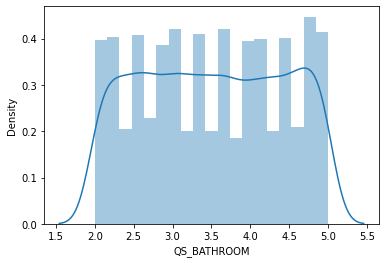

In [ ]:
sns.distplot(df['QS_BATHROOM'])

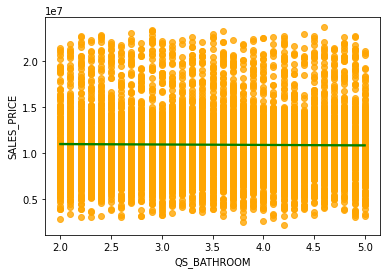

In [ ]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns.
* will drop this feature from the dataset.

**Checking Relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns**

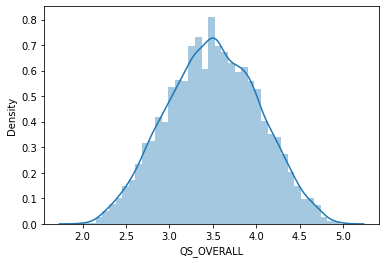

In [ ]:
sns.distplot(df['QS_OVERALL'])

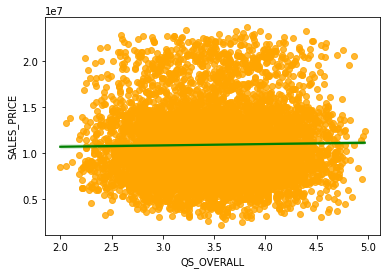

In [ ]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is no relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns.
* will drop this feature from the dataset.

**Checking Relationship in between the AGE Feature and SALES_PRICE Target columns**

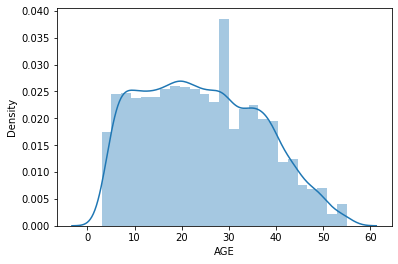

In [ ]:
sns.distplot(df['AGE'])

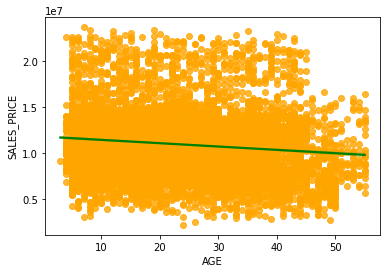

In [ ]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

* There is a negative relationship in between the AGE Feature and SALES_PRICE Target columns.
* will leave this feature as it is.It will helpful for further process.



**Insights From the Analysis**
* The distribution of the data in all the columns are normally distributed. In some columns only the data is very slightly skewed.
* INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM Features having strong relationship with SALES_PRICE Traget.These features are very important to train the model.
* SALE_COND,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL has no relationship with SALES_PRICE Target. So,will drop all these features.



In [ ]:
df.drop(['SALE_COND','QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE'],axis=1,inplace=True)

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30


In [ ]:
df.to_csv('cleaned.csv')

**Encoding of the data**

**Label Encoding for binary class and multi class - ordinal data**

In [ ]:
df.AREA = df.AREA.map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0, 'NoSewr':1, 'All Pub':2})
df.STREET = df.STREET.map({'No Access':0, 'Paved':1, 'Gravel':2})
df.MZZONE = df.MZZONE.map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})

**One-Hot Encoding for Multi-Class Nominal data**

In [ ]:
df=pd.get_dummies(df,columns=["BUILDTYPE"])
df.head()


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


In [ ]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
AGE                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Other         uint8
dtype: object

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


#**Linear Regression Model**

In [ ]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

***Splitting***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

***Scaling***

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

***Model Fitting***

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train) 

LinearRegression()

***Predicting Values***

In [ ]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([11348205.36979437,  9623789.36979437, 14489837.36979437, ...,
        8616173.36979437,  8624365.36979437, 13043949.36979437])

***Evaluation Metric-R2 value***

In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9198502856987485


#**K Nearest Neighbours algorithm (KNN)**

**Hyper parameter Tuning,Fitting the model**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))


K value  :  1  train score :  0.9999971887350179  score :  0.9350850649692403
K value  :  2  train score :  0.9842083772403594  score :  0.9487316255681542
K value  :  3  train score :  0.9778704375642737  score :  0.9526562212741926
K value  :  4  train score :  0.9740621747861195  score :  0.9537263331706416
K value  :  5  train score :  0.9713171237908226  score :  0.9527223949512125
K value  :  6  train score :  0.9683791711464063  score :  0.9520982176146324
K value  :  7  train score :  0.9658772703000379  score :  0.9516325240646177
K value  :  8  train score :  0.9638216238850625  score :  0.9508142876940617
K value  :  9  train score :  0.962300703549712  score :  0.950026246536083
K value  :  10  train score :  0.9610351509211829  score :  0.9489768242535339
K value  :  20  train score :  0.9493566505908264  score :  0.9408279747876159
K value  :  50  train score :  0.9256213109964062  score :  0.9181838705812707


***Scoring the model-R2 Score with best hyperparameter***

In [ ]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9525620309672573

#**Decision Tree Regressor Algorithm**

***Fitting the model***

In [ ]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train) 

DecisionTreeRegressor(max_depth=4)

***Predicted values***

In [ ]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([10886585.45045045,  9357960.06802721, 13699935.9202454 , ...,
        9357960.06802721,  9357960.06802721, 13786584.31092437])

***Evaluation Metric-R2 Score***

In [ ]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8808341928005369


#**Random Forest Regressor Algorithm**

***Fitting the model***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

***Predicting Values***

In [ ]:
y_pred = rf.predict(X_test_scaled) 
y_pred

array([11130060.74287808,  9197687.63966774, 13792028.35108539, ...,
        9479584.59162239,  9169401.9963982 , 11478111.99779533])

***Evaluation Metric-R2 Score***

In [ ]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8726025187908621


#**XG Boost Algorithm**

***Tuning Based on the learning rate, Fitting the model***

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3688269341240904  Cross-Val score :  -0.37504377623784796
Learning rate :  0.02  Train score :  0.7484550972960551  Cross-Val score :  0.7454409540674363
Learning rate :  0.03  Train score :  0.9255443043594358  Cross-Val score :  0.9232288134222703
Learning rate :  0.04  Train score :  0.9626852115747985  Cross-Val score :  0.9606986474567822
Learning rate :  0.05  Train score :  0.9743455245511672  Cross-Val score :  0.9725475303183077
Learning rate :  0.06  Train score :  0.9808572429203263  Cross-Val score :  0.9784266363755197
Learning rate :  0.07  Train score :  0.9849022697434554  Cross-Val score :  0.9826211112363122
Learning rate :  0.08  Train score :  0.9874524388881246  Cross-Val score :  0.9855100325331902
Learning rate :  0.09  Train score :  0.9892451104263139  Cross-Val score :  0.9876238032326073
Learning rate :  0.1  Train score :  0.99036112601742  Cross-Val score :  0.989189389177775
Learning rate :  0.11  Train score :  0.9

***Calcuating Score- R2 Score***

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[14:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9937629718351875

**Feature Importances**

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', True),
 ('BUILDTYPE_Other', True)]

In [ ]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('PARK_FACIL', False), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE', False), ('BUILDTYPE_Commercial', True), ('BUILDTYPE_House', False), ('BUILDTYPE_Other', False)]


Text(0.5, 1.0, 'Feature Importance')

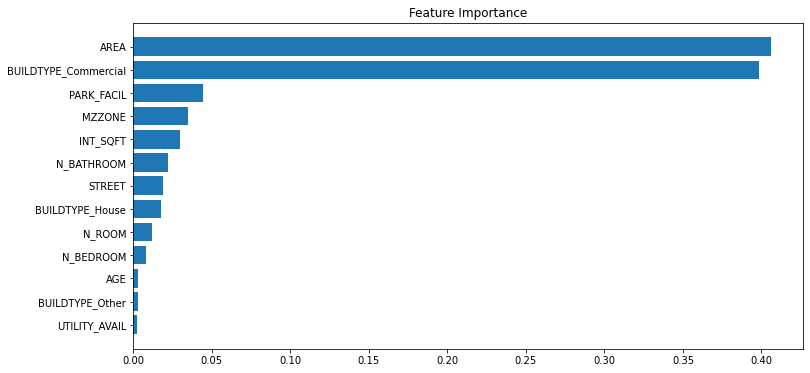

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

**The Columns AREA and BUILDTYPE_Commercial are the important features.**

**R2 Scores of all models**



   **Linear Regression -**  **0.92**

   **K Nearest Neighbours -**  **0.95**

   **Decision Tree -**  **0.87**

   **Random Forest -**   **0.87**

   **XG Boost -**   **0.99**



**Conclusion:** The best Machine Learning algorithm for Chennai House Price Prediction is **XG Boost** Model.

**Model Deployment With XGBOOST Model**

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 2.0 MB/s 
     |████████████████████████████████| 164 kB 34.4 MB/s 
     |████████████████████████████████| 181 kB 49.2 MB/s 
     |████████████████████████████████| 235 kB 46.7 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 4.7 MB 33.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 2.2 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=68829e9028894ceb580173c8259c6fdc3c7095b107af2783634c7a5d81d693e5
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
st.title("CHENNAI HOUSE PRICE PREDICTION")
import pandas as pd
df=pd.read_csv("/content/cleaned.csv")
#ENCODE
df["AREA"] = df["AREA"].map({'KARAPAKKAM':0, 'ANNA NAGAR':5, 'ADYAR':1, 'CHROMPET':2, 'KK NAGAR':4,'T NAGAR':6, 'VELACHERY':3})
df["PARK_FACIL"] = df["PARK_FACIL"].map({'No':0, 'Yes':1})
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].map({'AllPub':2, 'ELO':0,'NoSeWa':1})           
df["MZZONE"] = df["MZZONE"].map({'A':0, 'C':1, 'I':2, 'RH':3, 'RL':4, 'RM':5})   
df["STREET"] = df["STREET"].map({'No Access':0, 'Paved':1, 'Gravel':2})
df= pd.get_dummies(df,columns = ["BUILDTYPE"])
#SPLIT
train=list(df.columns)
train.remove('SALES_PRICE')
train.remove(train[0])
#Split my data
x_train, x_test, y_train, y_test = train_test_split(df[train].values,
                                                    df['SALES_PRICE'].values,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=None)
#SCALE
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
# BEST MODEL
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
model = xgb.XGBRegressor(learning_rate = 0.8, n_estimators=100)
model.fit(x_train,y_train)
##STREMLIT CODE
q1,q2=st.columns(2)
q1.video("https://www.youtube.com/watch?v=5IvQ3fYKnfM")
q2.image("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAA2FBMVEX///8U6IXx8vInIyMAAAAA534A6IL08vQA53wA6IAcFxf28vUIAAAmISH78/jHx8d2dHRqhJlyip74+PhHRETm5uYVDw+amZmCgYHT2d8fGhq8xs9kgJbBytITDAzb8eWmtMDl8euUpbSdrbqn7saw7suFmara3+SwvMZw7qrM8NyI7LXD79Y96ZKzsrLk5OS879KT7btb6p4u6Y19k6VhX1/V1NTy/fdraWlWU1N566076pKf7cGdnJxr66bc+um4uLg5NjZQTU3s/fPQ+eLNzMyP7LmAfn7hNW4zAAAPQElEQVR4nO2da0PaPBTHofRKaRUQlPsdOi4OAZ0iOt2z6ff/Rk+SNm3SJlA2Abfm/2KDkpT258nJSXJSUikhISEhISEhISEhISEhISEhISEhISEhISEhISEhISGhv0k/++tFWkdSZ19u5v+d+oI+q77fzHTdUNW0J1U1FD29np76uj6fvk9UACodlarr65+nvrpPpflMZ4HyeS0Hp77CT6Ofy22oPFzCuqC+LXahcnE9n/pCP4HmSgxUUEb6+6mv9dSa6PFQQenzU1/tabWIsIIBg6IrisLoG/VE+/mFEWpqij5bbwbT8Xg6uHkGwYSwLV80K1VPT6aSbZumBmSatj2eqEqIVmL9FuWvDP15bJuaRAoQG6RpXOqpL/pEmhOsVH3dsWlSrkzzhnJrajIjiG8EBGXWYqKCsltp0tXriYxOFwEC/Y2LCjZGaUb6tuWpL/wEmgaGpU9tPipIyyZ7giTGD8ugDY7NraxgU5ypSTatgW9Y+m5WoCUm2mv5hqXPt7dBj1YraLWJ6xB/4ns31iFWGghGJRia0i7ffgviLX3X2UvX7z8yuWbm4vzpV/TT60uJU+/pshgUKvHP/0J8+HL5ddfl/KmesQ9a0m3QtKeTmaLryuN6TPeQJhFobHfx1xdyM1u1Mhmrmi3L8vkd/fGV3LTYFe/l3IX38lJuyjykqSfwIaZ6va3gBwkblj4miWh2P+1NLquGPmuRIM2Bb1pb2+FLNQc4AVBVyAsoKz9Qf/uLakZmW03TymAIP6qZ8iXvK8AXyPgvcJ7NyGd73frewjeuLshGaLaW5NhGpd2ZHXxi8M98KwNE1aZc/nF7e9GUc1mAqyqT931h8WCVA1hPzYyV43zFSy5jZfEbACt3YFhfVIZh2fPwlKk+IGzL3PjBFnc4LWWykM2PF69lSGfnchngkt+DMrFgFeVMJvfC/hJgms0n/OYIsLDtPBKmY86j84B6K4CpdfzPeU5LylYzmeYr5aSKV8DWLDk4EAtW6iqbqV4wS90Bjn6xI8DCw0JjY7JYEC1xRtAMIlPjjX3eDGAlX4WPfn3NyefB23iwShDJHasUwJN9J98dGBYOHEjDoYL0wLTmQQnzBrdD9QvztPegxcnXjA+uyYPxYKVuq5nsOaMQbKBy0GMcHpbv3wO70cbMyXiyB9Cm2P2rM9ZZz6Cf4XZhvmLC+kW1tkDA9VcfgreHh+WZCEnCXIenkD3T6hBdgM+TOTzMWNRt8BQTVurVIvx4IMuiYoXDw5q4Lc5YBy7LXjJZpZU+swzjpNc5YAox4sO4sMD5rGj0CszXyhDvDw9r7cG6MRlWE2qHXwLrs/24nzW5DCyhHHHuDMWFlYLtMMLhAcQNpAc8PCwvzCI7Q1Zf6LY4oqm++U01es6vcjzDig/rshxt1qiTJA+cBBbPstI6EYn1FT6skOPlKzYsCYIJlbwqh8z3eLCIZmgrPFhBeKHNt8C6rzL9cVSxYaXus5GGHeF3PFgxHDw5ItLGW2BVLU4QGVZ8WHfhNgedfvWWOnI0WGToYH/h5IcoBCx/BpAROsR1WXvAgqPAHBXkgk5EpmfIjtYbUs57wGmHMWFJEStIXb5f+Xp/8Q/vAQvOL7wS74GpUe9Tx4RFOG+uh48JK9JNpd7lLKHAIPaAhY4QbRs4sVxoOHWEoNSI+CPJnrBDeGX6m5Z1W7awMhliKm8fWCB6IAaI4Dsik1xHG+7QUanEdlokLDx+VB8jpyxGfNbX12bZFZy4+T1Y9FkBusj06eFh4Wk8ej6LPZRWgnkHfyTNgJXK8aZUgO5yJCzutHIUFmRR9gOSrBXtQ44Hi5qjkcwpK7mUCYsx6/AjNA4hdUbCAgVl9oJMtI+A4wJ/Chm4++ikzeFh9f2JKWohzOwsornwxtyMBYt2L7QoWLcgHmAskKWYsCBaDANSjtjuEWHRMzCSZrcmMx3mSAZJkkpMWGesW8WfkbCushwTBB2qFZlJBqet/kCvgJExJpqPMPnnw6KXd9ASq9kaT6fTzUzfDxa0i3C/jkXBum5yTJDZzOAsmdtqAWTGEsbxZkrToQUcjwnKkrS9bAhlEBMWGONSM02EKFhwEMNc5XpnmhwYoGfRAJHwXoSOCov28aRsd7UnNiwYlnKG0hQs2G8yV7kYkwz4cAoZJOvsh4c1p4Y2HR4tNNcXGxY0LU70QMMC7Sk8aIGC01esxS9wWmhwGctiTckfGZaa7rBzjkxULD4sGAdZOVYI9YuCBacJm5GFDTR5+MKoXEIDwl8yuQAW6Aiw6JzadItJyx3dMGEtmKeF3siSo2HBXYZeezhnLJlJVYu3qnoLQ4Z7TnR2vHXDwMuzckrd6as9YKWuEa0rurWUzmH6A9k+i2UrvBh71rQyvFgVGFX1IcuZhz0+rLS+6ERT2txF1X1gAVrgnsvylU+m+HIro/QHypC+omLZJ6/JFs8eEM8XzllfLbTUzWRyAlhpVZ9E8uA1NdwbjnfBSt01YR5IWW7eXl0+XZ6/yrkqNLaLkCe7k+Hhslx+OD+/x4VeeCeFi2y8sOQUsNAOizmISDVMTLOfjf1hpYrvKG0G5rGVy1kLJRxlXiLFpAeICxZDaW+gY3jdksAHM744Ae/hYX1nL9UrymIzbUk20thLficH0v4UDR8W8FFXslx2E9msajkn37Lv5QzmB7qlsk35lTcGR7qUq1nOUOpJzh44848NC1IwFF030svlUtGjKVz+5N9WWEC/Lm8tGch6uDpjxEaeStfnF6BQ7uL+aVda6OXFLa/I032sZZLfFxcWQ8TUcwArSfnK/+2EpRqGAeceDH1CpHCNBSxGU1wu1m+bfr+/uSHTSv1FVgHLxaDoi80Y7dB0RYYTfjYbJ5nt39Q33rKXsp5q4e0CgfzkQAErrSz72tatdP5KWOJhGemBvX3HE5GelSRYqSgs0Ovt2BxGLJUlG5aaHu/aG6Z1gnWfRMMyZtKuPYdmZylgIVYLbgeIzcoeq8SCYoJhqbPtZqWZducLXWN96hs4pmjLkqJ2pZnwiSGuOoPwQ6OSCyuyFgYtadp/Wz8jzVQ98tCoZMEiUrGUm9CatN16W+pgCG2ortJRJQsWceNLm0Y1XUSebSRg4UY4p/b2duI90+43YJVW3I96jT+4lcMryOOmDMuecp9pZ8DnvPq7wpiw2qNtX1mpc+dMh+0/vJ3DyodF7mNi7mX16Cg3LdPsDLxH+LBh5WvbvrKS/1thPWIDIvOVyQddhLRE62QgnnCf9sOGVfhHYfkTU2R6lr3ktUE/5U3TuJZVclZdx0Hep9IddrEbGvWGQ0eDB/OpETheoSo1usNeCcOqBB83ul1nFBRxX7YlUKSSqnh/k1GNXwl+7Lj/S2333+Gw7S5e1kbU5/FhkVudiG1MYX8VJFOaKGlQnTBg9VbDXg/eQC/vVGqFoXuD9V6jtsqD26kUGgWn0c0T11hc5Z2GU2900f2AjypOvgtf9gq1Rq/eQ0UKjUq7DisV6xWnPqykHM9Eh11UqQYq9ehKLrq6y6ZdQG+6jUYXnSa1cq+gVtgXlkImwvN270RT4VmwQDN0ramRh1dZLMBrquXRn7Fdg7AQvnY+WOUbroqIB7p8B30gQccnofuU4D9d1IdW6vA0hd4KFim6vrEEjzkFeKSUb+BKWnD2AvoTIE86qjdcfvC/4e/C0juBx2JndlOtUPL2JXJgue2j4HjMUpTPr7jcpLzfEEvuEfA/vK28i9opwAOVUJEutKJCwSXRXuF/i7jSiqzkqYEsELnKVdc91Cv8CSyF2Lyz4cai5L5zZFnGFliABio5AgY2IswIO/i8H1QhnFDQskb5EapWgVW6+V7FK4L+TEUHkW+7xSVoU0XIBldCXEAlOnZB1zPsEX8geE2/D4uIsuw1z72rz+Ed+NtglQpYEtUDRmHVMCzosyq4FmqajWEdObcaPjoka0I7Q/fKruSfHxopbJzYPgG10W/AWjBgLXiwiNQQz/62WxbRI+WD7JkdllXK0xkLxUahSxRBNXE7G9Ul98tG0Uo94h34KmeY8qwwhcvv7eD3g0U+rwaV2gYrtSKu13OyUFFYkvdyhEoVwl15pQ5bHOGIAqe0ckbu2fKsSr6AK3PrDN2u2e0uhq4D6+4NS42xO9MgFvC9fedsWJ4brbhdj9NFrxFA2G6isECMAY2wVEANo+FyaQPUNVQJunrQeaKuddigYFVWbrSBK/XaVCWsYr7nvi25EYWDOtUaOk+twB+rhoQXtcjd4jwHr0hEITcpnA2rkV91e+gOVk67UECtsVZftXt52OXjsWGdGDV368P2sC65QWmtPoTVStAV5dtO1+NQ7zq9+rCI4iy/YgG3PxB5Od75iUpYbWyulXyh1y54tIf5bnvVrZEtfKv8R0K1oslXYVbkFn2vrbJhgaDYQT5KqrXbGAl8ja6x6B1pSFSNdq2YqpToouDmnJ4j+UW8uLwR9BajoC07rEq4WB2/LzbAJeH6DVhFCkUafOGNmKTvtpmsqOcc4SchcWB9Og17u8vsFm5y5P57c8AyLZWcoMe7Xf8GWJVVb1XgZ9LtIX8uhpzOssNPh09HJui90aNx8xEXcVgVG07tQ1gFyQ4UDG0WoqUa1HYCfxu1sfmQq/hbhAfNxoSaKZ2Q8++qvqA2qgTPblOS9YMD/iN4yMAA0OpM0ugXsFT46M05nYAUhK0J+70BPwXXoFfCNNNubZ5nj7PnTSuUgWT3g8cxn/ryj6zg2crhHXSauxQdTn8gJp05m8L+XQV7yme7ko1cVsRzu/+GzvBjFTx0dBKDliYRE/QJc1mp4Kkh4N5vdtLSpEdymH3qaz++giBB32VbVCZb0qIsJGJ0oyy2Zv7Z9I+vJa0vRCJm+1SVuZfVNStpTQ0a/4aB4cfrGzm40R+nzN0Cpj1Q6UFQIg0rtEdT1ZebToiXZmv9ZWjpNYm/JIMUmpQBI5zN2Mb7dmxbmq+V8Cr1rq2G/7D6oSksMCJUZuub/mDQv/nyGM2PTKvJ+9GdQIwJPzCGNuBOQ2Z+pPrt1Fd8Sn1nQuFITSeaFfqx37islKQNoBkaKDszbpFZ6YkMsCKaxEhQ1meJGz5z9G3C6PkIwWnTU1/jZ9JgFn04omtThp5+E1YV0n/9haIrRrCnAgYRur7YCFJsfR9Mnh9VHUl9XEwGAtRufUt4QCUkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJPSx+h+fgWwZVwIDXwAAAABJRU5ErkJggg==")
f1=st.selectbox("SELECT AREA",['KARAPAKKAM','ANNA NAGAR', 'ADYAR', 'CHROMPET', 'KK NAGAR', 'T NAGAR','VELACHERY'])
f11q={'KARAPAKKAM': 0, 'ANNA NAGAR': 5, 'ADYAR': 1, 'CHROMPET': 2, 'KK NAGAR': 4, 'T NAGAR': 6, 'VELACHERY': 3}
q = pd.DataFrame(
    [[12.9191,80.2300],
     [13.0012,80.2565],
     [12.9516,80.1462],
     [13.0410,80.1994],
     [13.0418,80.2341],
     [13.0850,80.2101],
     [12.9815, 80.2180]],
    columns=['lat', 'lon'])
st.map(q.loc[[f11q.get(f1)]])
f2=st.number_input("ENTER AREA IN SQFT")
c1,c2=st.columns(2)
f3=c1.radio("NO OF BEDROOM",[1,2,3,4])
f4=c2.radio("NO OF BATHROOM",[1,2])
f5=st.slider("NO OF ROOM",min_value=1,max_value=6,step=1)
f6=st.radio("PARKING FACILTY AVAILABILITY",["YES","NO"])
f7=st.date_input("SELECT DATE OF BUILD")
f8=st.selectbox("UTILITY AVAILABILITY",['AllPub', 'ELO', 'NoSeWa'])
f9=st.selectbox("MZZONE",['A', 'C', 'I', 'RH', 'RL', 'RM'])
f10=st.selectbox("STREET",['No Access', 'Paved', 'Gravel'])
f11=st.selectbox("BUILDING TYPE",['Commercial', 'HOUSE', 'OTHERS'])
f81={'AllPub': 2, 'ELO': 0, 'NoSeWa': 1}
f91={'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5}
f101={'No Access':0,'Paved':1, 'Gravel':2}
f111={'Commercial':2, 'House':0, 'Others':1}
st.checkbox("I ACCEPT TERMS AND CONDITIONS ")
if st.button("CLICK HERE TO PREDICT THE REAL PRICE VALUE"):
    st.header(*model.predict([[f11q.get(f1),
                           f2,
                           f3,
                           f4,
                           f5,
                           0 if f6=="NO" else 1,
                           (pd.Timestamp.today().date()-f7).days,
                           f81.get(f8),
                           f91.get(f9),
                           f101.get(f10),
                           1 if f111.get(f11)==2 else 0,
                           1 if f111.get(f11)==0 else 0,
                           1 if f111.get(f11)==1 else 0]]))
    st.write("THE PREDICTED PRICE OF THE XGBOOST MODEL.... ")
    st.markdown(':moon:')
    st.balloons()                                                       

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-10-02 14:48:40.654 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[..................] \ fetchMetadata: sill resolveWithNewModule openurl@1.1.1 c


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.229.219.227:8501

npx: installed 22 in 3.385s
your url is: https://crazy-eggs-change-35-229-219-227.loca.lt
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
[14:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:13] WARN